In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmwl/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import pickle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hmm_data_a.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access the loaded data
loaded_ss = loaded_data['state_sequence']
loaded_data = loaded_data['data']

In [4]:
# changes made
# degrees of freedom added 1
# updated rho in init - should break now ?

# todo
# likelihood
# return Gaussian HMM - somehow select states with high count
# numba functions


In [18]:
import final.models.hdphmm.hdphmmwl.hdphmmwl as hdphmm
from final.models.hdphmm.helpers.plot_hmm import plot_hmm_data
import final.models.hdphmm.hdphmmwl.consts as const
import final.models.hdphmm.hdphmmwl.numba_wl as numba
reload(const)
reload(numba)
reload(hdphmm)

sbp = {
    const.ALPHA0: 50,
    const.GAMMA0: 100,
    const.KAPPA0: 10,
}
sbp[const.RHO0] = sbp[const.KAPPA0] / ( sbp[const.KAPPA0] + sbp[const.ALPHA0])
temp = 1
hdp_hmm = hdphmm.HDPHMMWL(loaded_data, 8, loaded_ss, iterations=20, sbp=sbp)

sbp given
init ari 0.108


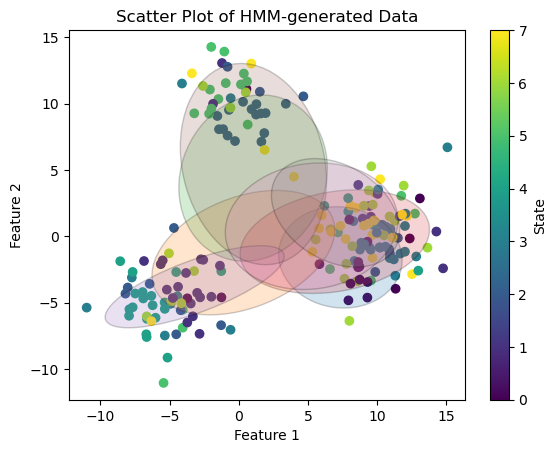

In [19]:
plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma)
# hdp_hmm.gibbs_sweep()

fitting using gibbs sampling
time for backward_robust_mv 0.019701004028320312
time for backward_robust_mv 0.013654947280883789
time for backward_robust_mv 0.013499975204467773
time for backward_robust_mv 0.013498067855834961
time for backward_robust_mv 0.013437986373901367
time for backward_robust_mv 0.013541221618652344
time for backward_robust_mv 0.01357889175415039
time for backward_robust_mv 0.013509035110473633
time for backward_robust_mv 0.013422966003417969
time for backward_robust_mv 0.01350092887878418
time for backward_robust_mv 0.013620853424072266
time for backward_robust_mv 0.013700008392333984
time for backward_robust_mv 0.013521909713745117
time for backward_robust_mv 0.013365745544433594
time for backward_robust_mv 0.013440132141113281
time for backward_robust_mv 0.013448953628540039
time for backward_robust_mv 0.013443946838378906
time for backward_robust_mv 0.013608217239379883
time for backward_robust_mv 0.01358175277709961
time for backward_robust_mv 0.0135040283203

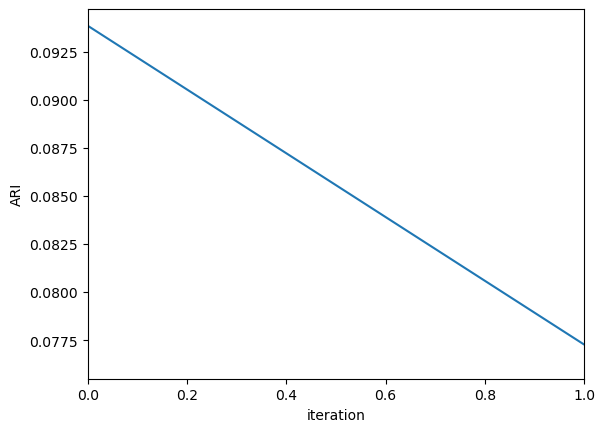

average time for one gibbs sweep:  0.08082035779953003


In [23]:
hdp_hmm.fit()

plt.plot(range(0,len(hdp_hmm.trace[const.TIME])), hdp_hmm.trace[const.TIME], marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
plt.xlim(0,1)
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

print('average time for one gibbs sweep: ', np.mean(hdp_hmm.trace[const.TIME]))


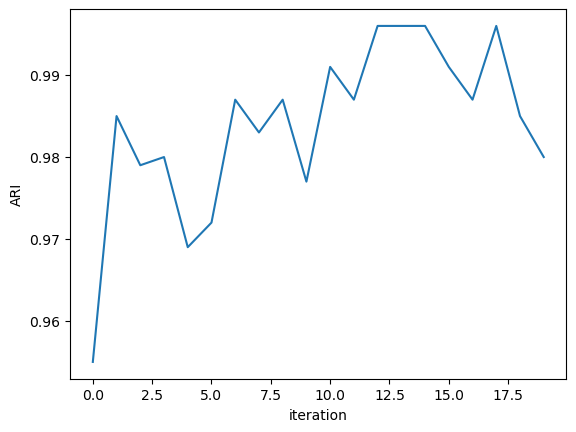

In [24]:
plt.plot(range(0,len(hdp_hmm.ARI)), hdp_hmm.ARI, marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

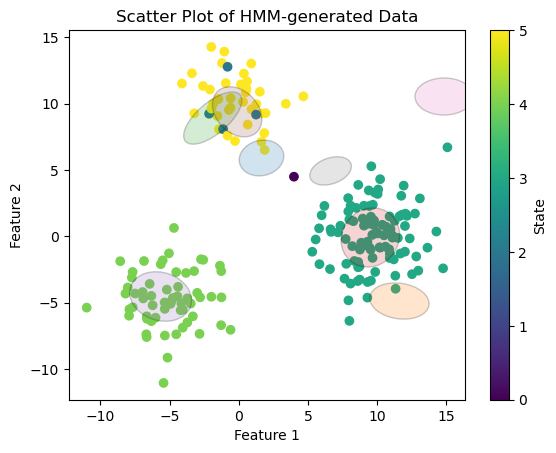

In [25]:
plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma)

In [17]:
# test numba
from numpy import *
import math
from numba_stats import qgaussian
from numba_stats import norm
import numpy as np
from scipy.stats import multivariate_normal

# Set a random seed for reproducibility
np.random.seed(42)

# Dimensionality of the multivariate normal distribution
n = 3

# Generate random mean and covariance
mu = np.random.rand(n)
covariance = np.random.rand(n, n)
covariance = np.dot(covariance, covariance.T)  # Ensure positive semi-definite

# Create a multivariate normal distribution
mvn = multivariate_normal(mean=mu, cov=covariance)

# Generate a random point (x) from the distribution
x = mvn.rvs()

# Calculate the true log PDF using scipy.stats.multivariate_normal
true_log_pdf = mvn.logpdf(x)

def logpdf(x, mean, cov):
    vals, vecs = np.linalg.eigh(cov)
    logdet     = np.sum(np.log(vals))
    valsinv    = 1./vals
    U          = vecs * np.sqrt(valsinv)
    dim        = len(vals)
    dev        = x - mean
    maha       = np.square(np.dot(dev, U)).sum()
    log2pi     = np.log(2 * np.pi)
    return -0.5 * (dim * log2pi + maha + logdet)

# Calculate the log PDF using your implementation
log_pdf = logpdf(x, mu, covariance)
# log_pdf_v2 = np.log(norm_pdf_multivariate(x, mu, covariance))

# Print the results
print("Random mean (mu):", mu)
print("Random covariance matrix:")
print(covariance)
print("Random point (x):", x)
print("True log PDF from scipy.stats.multivariate_normal:", true_log_pdf)
print("Log PDF from your implementation:", log_pdf)
# print("Log PDF from your implementation v2:", log_pdf_v2)



Random mean (mu): [0.37454012 0.95071431 0.73199394]
Random covariance matrix:
[[0.40706809 0.26368252 0.57840584]
 [0.26368252 1.11497408 0.64198458]
 [0.57840584 0.64198458 1.44251562]]
Random point (x): [0.88014548 0.97210524 1.39905258]
True log PDF from scipy.stats.multivariate_normal: -2.3399600712571655
Log PDF from your implementation: -2.339960071257165


In [14]:
def logpdf(x, mean, cov):
    vals, vecs = np.linalg.eigh(cov)
    logdet     = np.sum(np.log(vals))
    valsinv    = 1./vals
    U          = vecs * np.sqrt(valsinv)
    dim        = len(vals)
    dev        = x - mean
    maha       = np.square(np.dot(dev, U)).sum()
    log2pi     = np.log(2 * np.pi)
    return -0.5 * (dim * log2pi + maha + logdet)


In [15]:
def multiple_logpdfs(x, means, covs):
    """Compute multivariate normal log PDF over multiple sets of parameters.
    """
    # NumPy broadcasts `eigh`.
    vals, vecs = np.linalg.eigh(covs)

    # Compute the log determinants across the second axis.
    logdets    = np.sum(np.log(vals), axis=1)

    # Invert the eigenvalues.
    valsinvs   = 1./vals

    # Add a dimension to `valsinvs` so that NumPy broadcasts appropriately.
    Us         = vecs * np.sqrt(valsinvs)[:, None]
    devs       = x - means

    # Use `einsum` for matrix-vector multiplications across the first dimension.
    devUs      = np.einsum('ni,nij->nj', devs, Us)

    # Compute the Mahalanobis distance by squaring each term and summing.
    mahas      = np.sum(np.square(devUs), axis=1)

    # Compute and broadcast scalar normalizers.
    dim        = len(vals[0])
    log2pi     = np.log(2 * np.pi)
    return -0.5 * (dim * log2pi + mahas + logdets)

In [16]:
import numpy as np
from   scipy.stats import (invwishart,
                           multivariate_normal)
from   time import perf_counter

dim   = 3
n     = 100
# Generate random data, means, and positive-definite covariance matrices.
x     = np.random.normal(size=dim)
means = np.random.random(size=(n, dim))
covs  = invwishart(df=dim, scale=np.eye(dim)).rvs(size=n)
ps1   = np.empty(n)

# Compute and time probabilities the slow way.
s = perf_counter()
for i, (m, c) in enumerate(zip(means, covs)):
    ps1[i] = multivariate_normal(m, c).logpdf(x)
t1 = perf_counter() - s

# Compute and time probabilities the fast way.
s = perf_counter()
ps2 = multiple_logpdfs(x, means, covs)
t2 = perf_counter() - s

print(t1 / t2)
assert(np.allclose(ps1, ps2))

3.3820448831887724


In [ ]:
logpdf()